# Домашнее задание №3

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [19]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2

Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

In [3]:
data.sort_values(by=['Direct_Bilirubin'], inplace=True)

X = data[['Age', 'Gender', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
          'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset']]
totalb = data[['Total_Bilirubin']]

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    totalb,
    test_size = 0.2,
    random_state = 42
)

In [5]:
X_train_dirb = X_train[['Direct_Bilirubin']]
X_test_dirb = X_test[['Direct_Bilirubin']]

In [6]:
X_train_dirb = np.array(X_train_dirb).reshape(-1, 1)
X_test_dirb = np.array(X_test_dirb).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_dirb, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
model.score(X_test_dirb, y_test)

0.9430572779725598

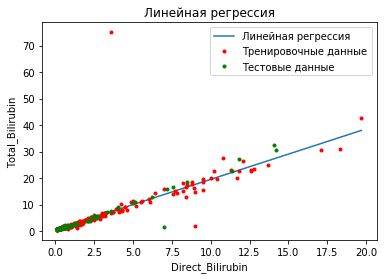

In [9]:
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Линейная регрессия')
x = np.linspace(min(X_train_dirb), max(X_train_dirb), 100)
y = (model.coef_*x + model.intercept_)
plt.plot(x,y)
plt.plot(X_train_dirb, y_train, 'r.')
plt.plot(X_test_dirb, y_test, 'g.')
plt.legend(['Линейная регрессия', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Построить одномерную полиномиальную регрессию на Direct_Bilirubin и Total_Bilirubin, используя тренировочные и тестовые данные из шага выше. Проверить точность предсказаний на тестовых данных. Получилось ли улучшить результат?

In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_poly = poly_reg.fit_transform(X_train_dirb)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

pol_reg.score(poly_reg.fit_transform(X_test_dirb), y_test)

0.9396246797134126

Результат улучшить не получилось

Построить многомерную **логистическую регрессию** для предсказания болезни (Dataset) от всех параметров, предварительно разделив данные на 80% тренировочных и 20% тестовых. Сделать классификационный отчет (куда включить количество найденных параметров true positive и false negative). Посмотреть какой получился результат.

In [22]:
data['Gender'].replace(['Female', 'Male'], [0, 1], inplace=True)
data.head()

In [27]:
data = data.dropna()

In [28]:
X = data.drop('Dataset', axis=1)
y = data.Dataset

In [29]:
from sklearn.linear_model import LogisticRegression

# разделим на тренировочные данные и на тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [30]:
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [31]:
from sklearn.metrics import classification_report

model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           1       0.76      0.82      0.79        85
           2       0.38      0.29      0.33        31

    accuracy                           0.68       116
   macro avg       0.57      0.56      0.56       116
weighted avg       0.66      0.68      0.67       116



Улучшить модель за счет уменьшения параметров, отобранных для обучения модели. Выбрать только те атрибуты, которые коррелируют с таргет значением (атрибут Dataset) более 50% (нужно будет построить матрицу корреляций и посмотреть в ней параметры, наиболее коррелирующие с Dataset атрибутом). Проверить модель на тестовых данных, полученных выше. Построить классификационный отчет, сделать сравнение двух моделей по этим классификационным отчетам.

In [32]:
np.round_(data.corr(), decimals=2)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.00,0.06,0.01,0.01,0.08,-0.09,-0.02,-0.19,-0.26,-0.22,-0.13
Gender,0.06,1.00,0.09,0.10,-0.03,0.08,0.08,-0.10,-0.10,-0.00,-0.08
Total_Bilirubin,0.01,0.09,1.00,0.87,0.21,0.21,0.24,-0.01,-0.22,-0.21,-0.22
Direct_Bilirubin,0.01,0.10,0.87,1.00,0.23,0.23,0.26,0.00,-0.23,-0.20,-0.25
Alkaline_Phosphotase,0.08,-0.03,0.21,0.23,1.00,0.12,0.17,-0.03,-0.16,-0.23,-0.18
Alamine_Aminotransferase,-0.09,0.08,0.21,0.23,0.12,1.00,0.79,-0.04,-0.03,-0.00,-0.16
Aspartate_Aminotransferase,-0.02,0.08,0.24,0.26,0.17,0.79,1.00,-0.03,-0.08,-0.07,-0.15
Total_Protiens,-0.19,-0.10,-0.01,0.00,-0.03,-0.04,-0.03,1.00,0.78,0.23,0.03
Albumin,-0.26,-0.10,-0.22,-0.23,-0.16,-0.03,-0.08,0.78,1.00,0.69,0.16
Albumin_and_Globulin_Ratio,-0.22,-0.00,-0.21,-0.20,-0.23,-0.00,-0.07,0.23,0.69,1.00,0.16


Dataset не коррелирует с другими полями более, чем на 50%

Посчитать квартили для всех колонок. 

In [33]:
data.quantile([.25, .75])

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.25,33.0,1.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.7,1.0
0.75,58.0,1.0,2.6,1.3,298.0,61.0,87.0,7.2,3.8,1.1,2.0


Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

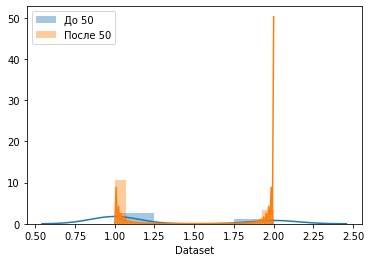

In [40]:
underf = data[data['Age']<50]['Dataset']
overf = data[data['Age']>50]['Dataset']
sns.distplot(underf)
sns.distplot(overf)
plt.legend(['До 50', 'После 50'])
plt.show()

In [42]:
underf.quantile([.5])

0.5    1.0
Name: Dataset, dtype: float64

In [43]:
underf.mean()

1.3142857142857143

Квартиль 0,5 - это медиана, а ср.знач - это сумма всех элементов, разделенное на количество


Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [45]:
tb_sick = data[data['Dataset']==1]['Total_Bilirubin']
stats.ttest_1samp(tb_sick, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=2.4588588880494733, pvalue=0.014347239706774866)

pvalue меньше альфы, значит есть статистическое различие

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [46]:
tb_healthy = data[data['Dataset']==2]['Total_Bilirubin']

stats.ttest_ind(tb_sick, tb_healthy)

Ttest_indResult(statistic=5.422946004172417, pvalue=8.632557516910643e-08)

pvalue больше альфа-ошибки, значит не можем отклонить нулевую гипотезу, статистического различия нет

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [53]:
group1 = data[data['Age'] < 30]['Dataset']

group2 = data[(data['Age'] >= 30)&(data['Age'] < 55)]['Dataset']

group3 = data[data['Age'] > 55]['Dataset']

stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=8.517422687363302, pvalue=0.00022712774451185002)

pvalue меньше 0.05, отвергаем нулевую гипотезу, что различий нет. Насолько я понимаю, множественный тест плох тем, что при добавлении каждой новой выборки статзначимость существенно падает

Вопросы задавать на почту yustiks@gmail.com